**FILE ATTACHMENT 3**
### 2.2) Is there evidence of multicollinearity? Showcase your analysis.	2.5

### 2.3) Perform Multiple Linear Regression (using the 'statsmodels' library) and comment on the model thus built.	4

### 2.4) Perform Principal Component Analysis (on the predictor variables) and extract the Principal Components. Comment on the reason behind choosing the number of Principal Components.	5

### 2.5) Perform Multiple Linear Regression with 'FamilyIncome' as the dependent variable and the Principal Components extracted as the independent variables. 4 ###

### 2.6) Comment on the Model thus built using the Principal Components and with 'FamilyIncome'.	4

### 2.7) Mention the business implication and interpretation of the models.

In [1]:
#Import all the necessary modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

##### Load data and check first few rows of each variable.

In [2]:
income = pd.read_csv("Income.csv")
income.head()

,WorkingHoursWife,WifeAge,EducationWife,WifeHourEarnings,WifeWage,WorkingHoursHusband,HusbandAge,EducationHusband,HusbandWage,EducationWifeMother,EducationWifeFather,UnemploymentRate,WifeExperience,FamilyIncome
0,1610,32,12,3.3540,2.65,2708,34,12,4.0288,12,7,5.0,14,16310
1,1656,30,12,1.3889,2.65,2310,30,9,8.4416,7,7,11.0,5,21800
2,1980,35,12,4.5455,4.04,3072,40,12,3.5807,12,7,5.0,15,21040
3,456,34,12,1.0965,3.25,1920,53,10,3.5417,7,7,5.0,6,7300
4,1568,31,14,4.5918,3.60,2000,32,12,10.0000,12,14,9.5,7,27300


In [3]:
list=[]
for col in income.columns:
    list.append(col)
print(list)
list_X = list[:-1]

['WorkingHoursWife', 'WifeAge', 'EducationWife', 'WifeHourEarnings', 'WifeWage', 'WorkingHoursHusband', 'HusbandAge', 'EducationHusband', 'HusbandWage', 'EducationWifeMother', 'EducationWifeFather', 'UnemploymentRate', 'WifeExperience', 'FamilyIncome']


Basic checks on data set have been done in the EDA file. The dataset does not need any treatment and can be used for further analysis

### 2.2) Check for Multicollinearity in the variables

We use three ways to check collinearity

1. by statistical display of values in .corr()

2. by pairplot and,

3. by heat map

In [4]:
income.corr()

,WorkingHoursWife,WifeAge,EducationWife,WifeHourEarnings,WifeWage,WorkingHoursHusband,HusbandAge,EducationHusband,HusbandWage,EducationWifeMother,EducationWifeFather,UnemploymentRate,WifeExperience,FamilyIncome
WorkingHoursWife,1.000000,-0.033114,0.105960,0.422944,0.606916,-0.056348,-0.031089,-0.009650,-0.098599,0.057864,0.013671,-0.060290,0.404959,0.146306
WifeAge,-0.033114,1.000000,-0.120223,-0.034559,-0.058315,-0.084372,0.888138,-0.163049,0.027015,-0.234642,-0.160591,0.077077,0.334016,0.052440
EducationWife,0.105960,-0.120223,1.000000,0.318378,0.267575,0.078916,-0.133522,0.611954,0.284936,0.435336,0.442458,0.072140,0.066256,0.361275
WifeHourEarnings,0.422944,-0.034559,0.318378,1.000000,0.651641,-0.059919,-0.031836,0.126224,0.061290,0.090305,0.098477,-0.000128,0.250580,0.231175
WifeWage,0.606916,-0.058315,0.267575,0.651641,1.000000,-0.070797,-0.055399,0.106967,0.019276,0.085598,0.102772,0.009124,0.341557,0.208712
WorkingHoursHusband,-0.056348,-0.084372,0.078916,-0.059919,-0.070797,1.000000,-0.095387,0.107845,-0.236021,0.053354,0.050345,-0.155220,-0.099366,0.128142
HusbandAge,-0.031089,0.888138,-0.133522,-0.031836,-0.055399,-0.095387,1.000000,-0.195323,0.019681,-0.227457,-0.135000,0.053094,0.271910,0.040503
EducationHusband,-0.009650,-0.163049,0.611954,0.126224,0.106967,0.107845,-0.195323,1.000000,0.394665,0.324475,0.366700,0.055017,-0.036301,0.376872
HusbandWage,-0.098599,0.027015,0.284936,0.061290,0.019276,-0.236021,0.019681,0.394665,1.000000,0.126736,0.193229,0.157920,-0.103306,0.725023
EducationWifeMother,0.057864,-0.234642,0.435336,0.090305,0.085598,0.053354,-0.227457,0.324475,0.126736,1.000000,0.573072,0.018402,-0.082179,0.159894


Text(0.5, 1, 'fig.1 - correlation')

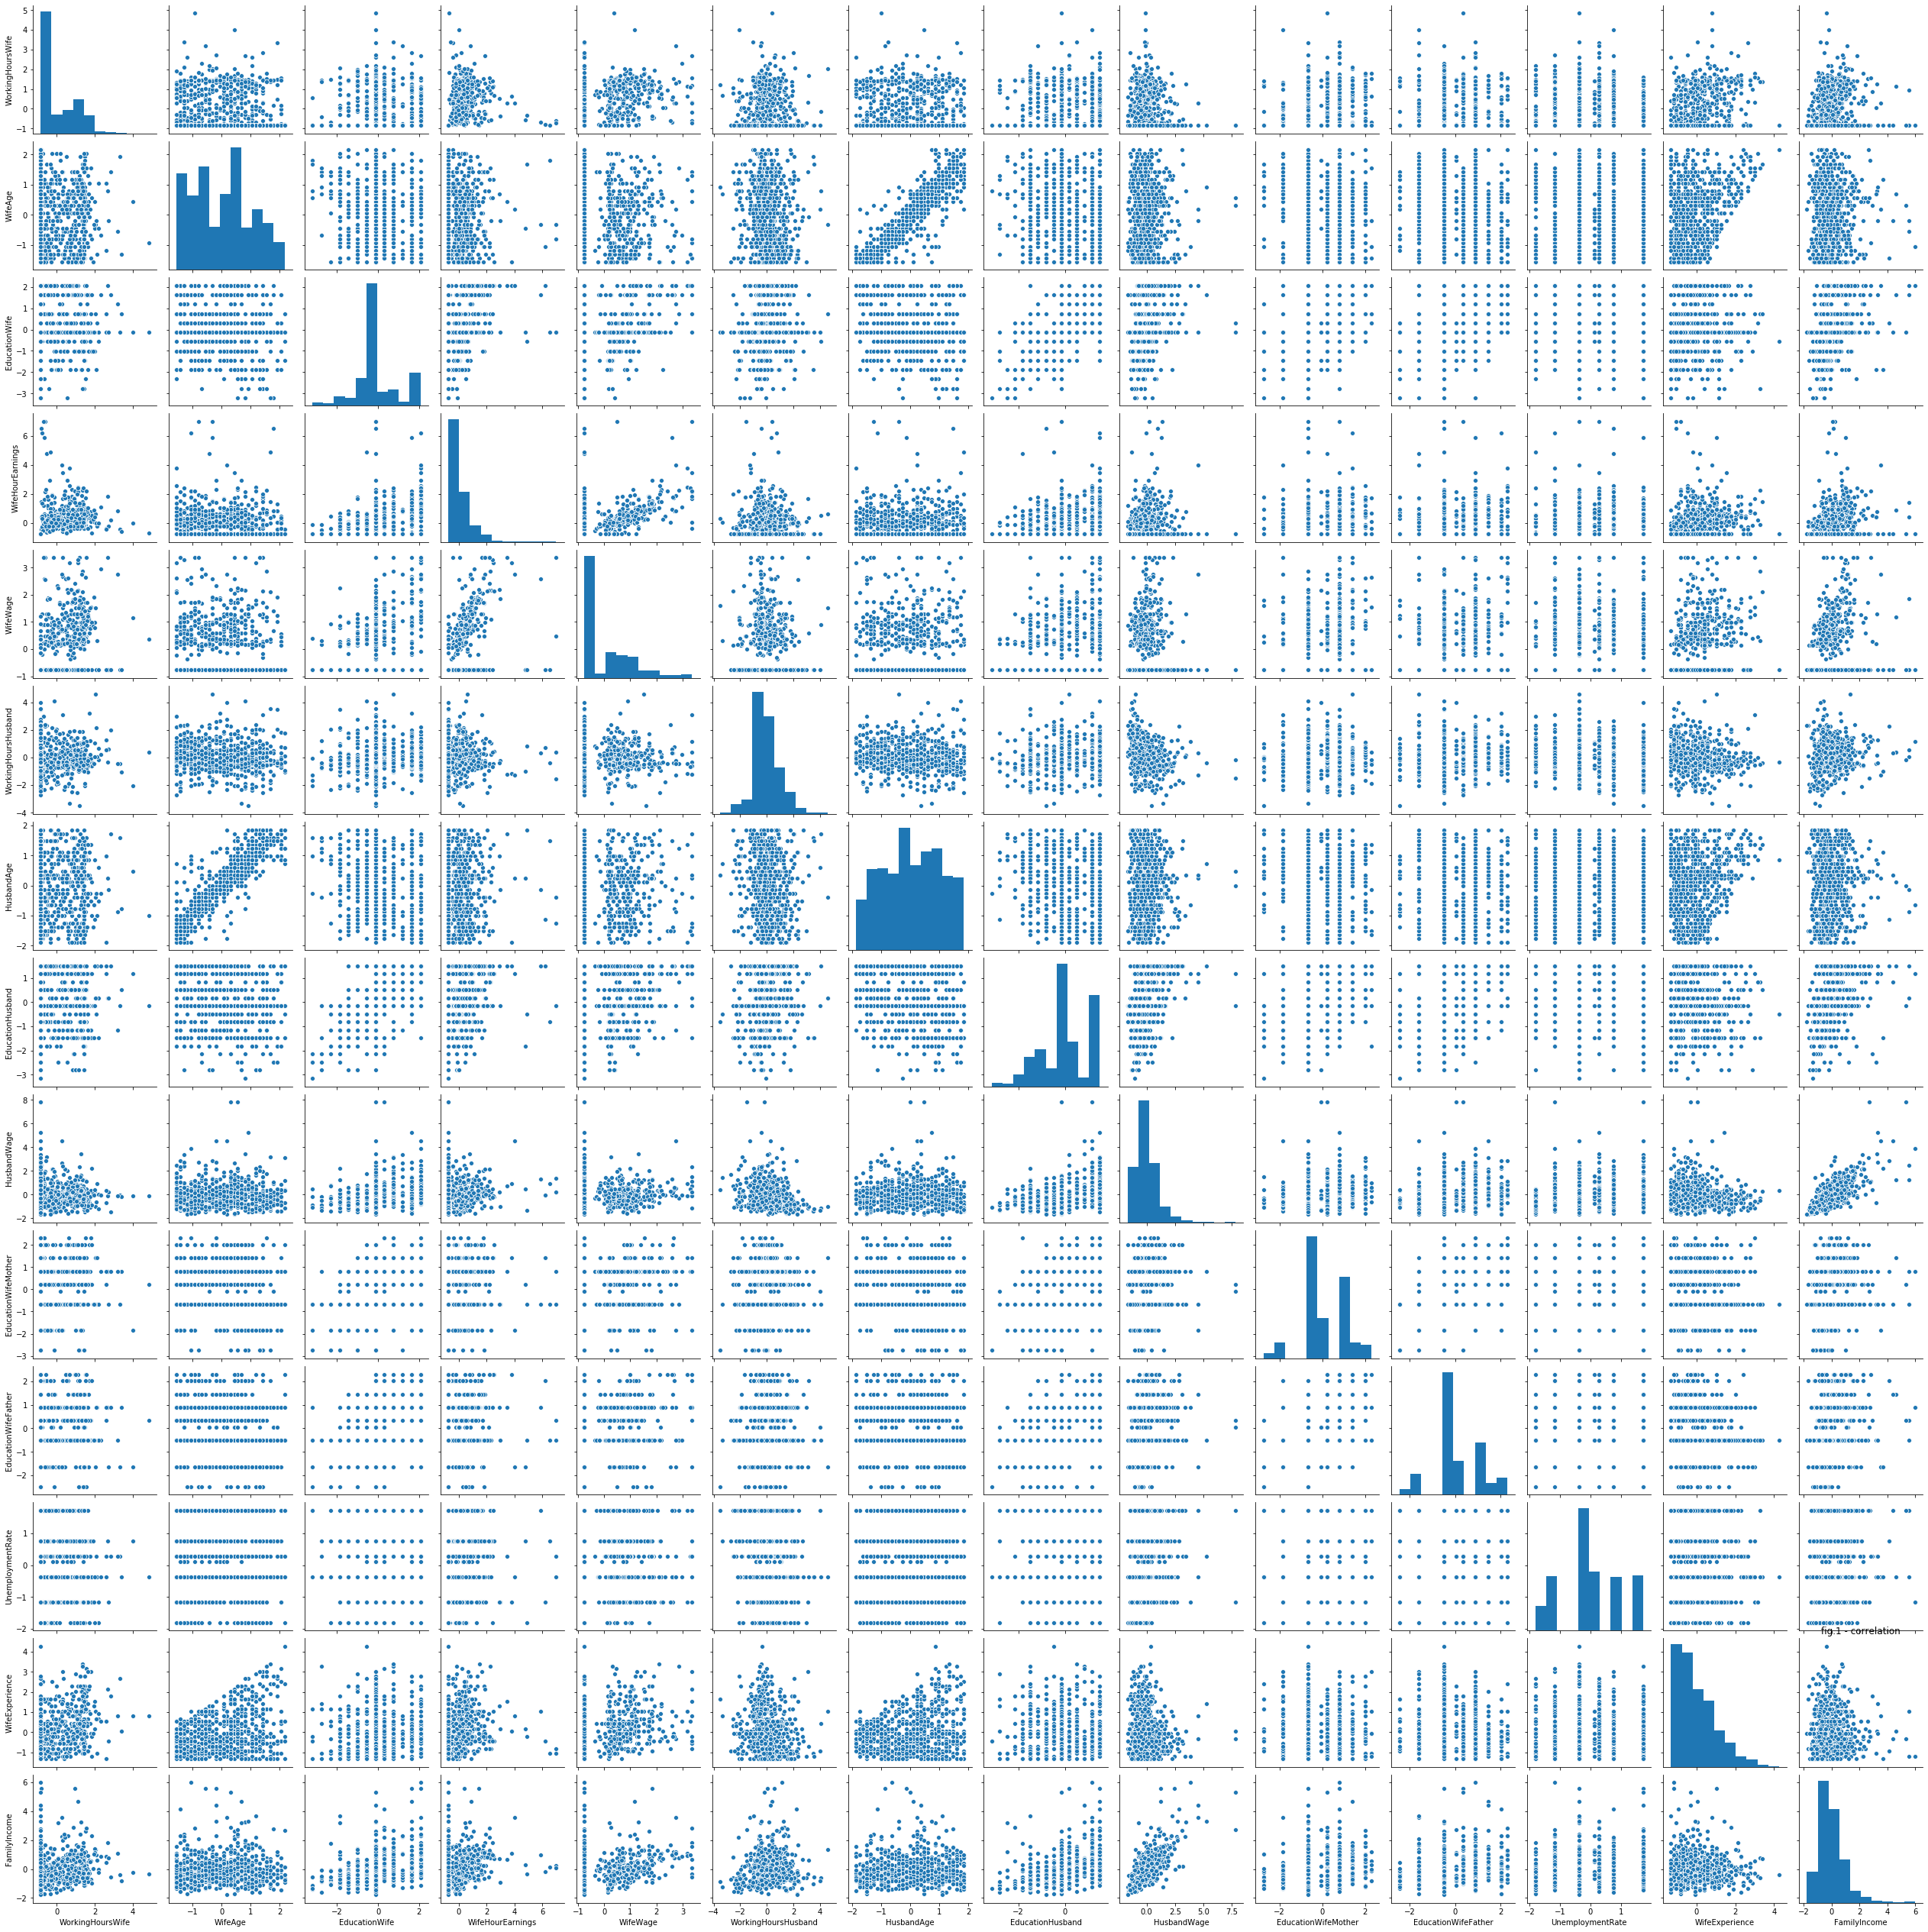

In [59]:
sns.pairplot(income)
plt.title('fig.1 - correlation')

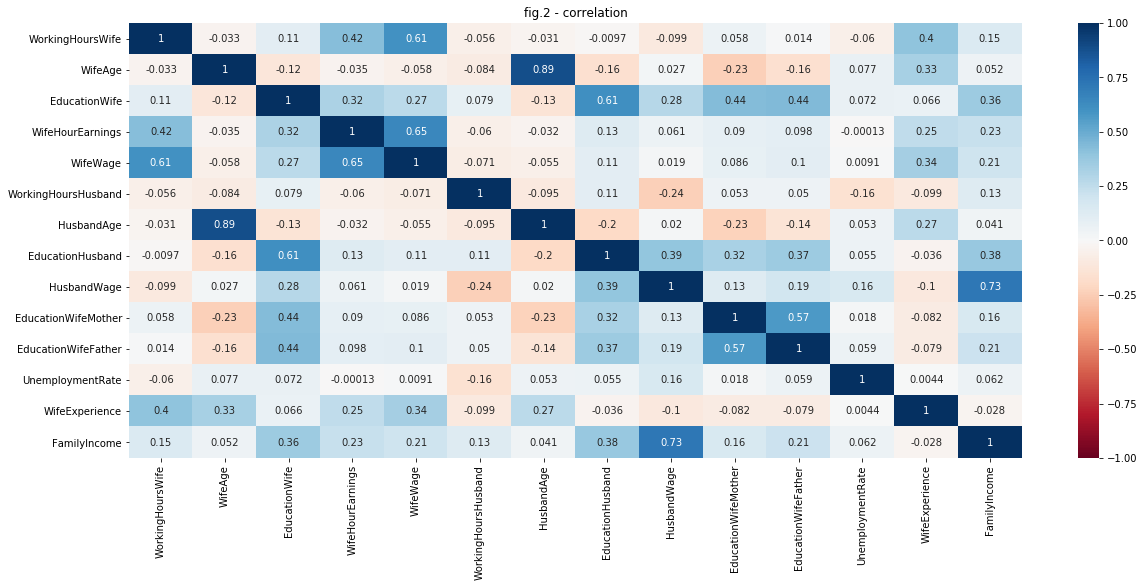

In [60]:
plt.figure(figsize=(20,8))
sns.heatmap(income.corr(),cmap='RdBu',annot=True,vmin=-1,vmax=1)
plt.title('fig.2 - correlation')
plt.show()

**Plot features in pair plot to check visual effect of collinearity**

Text(0.5, 1, 'Plot 1 - WifeAge and HusbandAge')

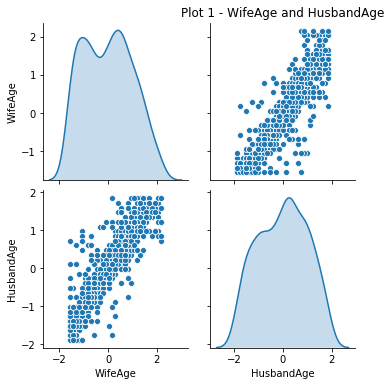

In [61]:
sns.pairplot(income, vars=["WifeAge","HusbandAge"], diag_kind='kde')
plt.title('Plot 1 - WifeAge and HusbandAge')

Text(0.5, 1, 'Plot 2 -WifeWage and WifeHourEarnings')

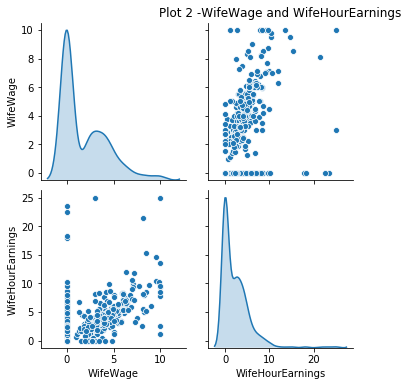

In [8]:
sns.pairplot(income, vars=["WifeWage","WifeHourEarnings"], diag_kind='kde')
plt.title('Plot 2 -WifeWage and WifeHourEarnings')

Text(0.5, 1, 'Plot 3 - WifeWage and WorkingHoursWife')

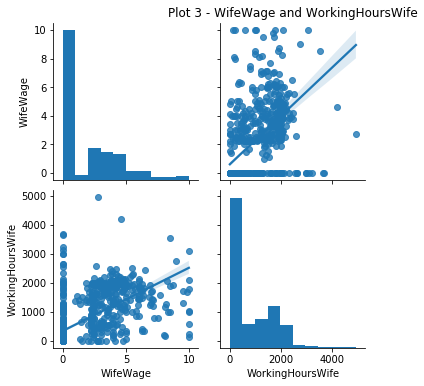

In [9]:
sns.pairplot(income, vars=["WifeWage","WorkingHoursWife"],kind='reg')
plt.title('Plot 3 - WifeWage and WorkingHoursWife')

Text(0.5, 1, 'Plot 4 - EducationWifeMother and EducationWifeFather')

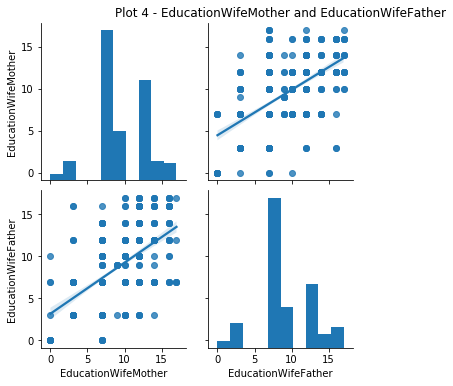

In [10]:
sns.pairplot(income, vars=["EducationWifeMother","EducationWifeFather"],kind='reg')
plt.title('Plot 4 - EducationWifeMother and EducationWifeFather')

#### 2.2) findings
From the three correlation measurements, we find heat map is easiest to read when no. of variables are higher.

Observation 1 : As the assumption of Linear Regression, DV and IV should have linear relationship. In the above matrix, only HusbandWage and FamilyIncome shows strong linear relationship of 0.73 and rest of the IVs show very slight correlation with FamilyIncome which is 0.36 and lower.

Observation 2 : About the collinearity between IVs, it can be observed that a few independent variables show collinearity among them. 
A very strong correlation can be seen between WifeAge and HusbandAge at 0.89
Next two strong correlation are at 0.65 between WifeWage and WifeHourEarning. 
Also, next strong relation at 0.61 is observed between EducationHusband and EducationWife , and between WifeWage and WorkingHoursWife.
A slight linear relationship can be observed between EducationWifeFather and EducationWifeMother of 0.57.
Rest of the IVs have a correlation of less than 0.44 which is favourable for the model.

From above, we can say there is some evidence of collinearity between a few IV.

### 2.3) Perform Multiple Linear Regression (using the 'statsmodels' library) and comment on the model thus built. 4

#### Check-points to follow before applying Multiple Linear Regression
If the variables in the data set are at varied scales of measurements as in our case, it is better to standardise the data before performing the model.

Generate correlation and covariance matrix of all IVs to understand if that data is standardized.

Standardise by applying zscore transformation and again check corr and cov.

Separate the data into IVs and DV and split the data into training and testing data

##### Step 1: Computing Corr and Cov
*Corr matrix can be referred from Q 2.2 , fig.2 above*

In [4]:
#Compute covariance of IVs. We can not make any inference from the covariance matrix here. However, if we standardis the data
#covariance will be in the range of -1 to +1 and it would be easier to work witht he data

np.cov(income[list_X])

array([[700073.19374945, 626868.107257  , 810571.3954465 , ...,
        466102.28730177, 330716.42563528, 610936.28172719],
       [626868.107257  , 566194.59614179, 728461.55106672, ...,
        392956.52064695, 278609.45161303, 515112.66504262],
       [810571.3954465 , 728461.55106672, 939954.70696893, ...,
        526372.98397426, 373364.50324792, 689965.48843299],
       ...,
       [466102.28730177, 392956.52064695, 526372.98397426, ...,
        432909.30839082, 308281.58649964, 567120.6514225 ],
       [330716.42563528, 278609.45161303, 373364.50324792, ...,
        308281.58649964, 219619.75130256, 403825.8824892 ],
       [610936.28172719, 515112.66504262, 689965.48843299, ...,
        567120.6514225 , 403825.8824892 , 742980.91841252]])

##### Step 2:Transform (centralize) the data variables through zscores transformation.

In [5]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
income[list]=std_scale.fit_transform(income[list])

In [6]:
# check data after scaling
income

,WorkingHoursWife,WifeAge,EducationWife,WifeHourEarnings,WifeWage,WorkingHoursHusband,HusbandAge,EducationHusband,HusbandWage,EducationWifeMother,EducationWifeFather,UnemploymentRate,WifeExperience,FamilyIncome
0,0.998493,-1.306257,-0.125883,0.302325,0.330924,0.740508,-1.380882,-0.162769,-0.816836,0.816884,-0.506669,-1.164042,0.417818,-0.555782
1,1.051322,-1.554174,-0.125883,-0.304248,0.330924,0.071793,-1.877564,-1.156543,0.226934,-0.668898,-0.506669,0.763443,-0.698285,-0.105121
2,1.423422,-0.934381,-0.125883,0.670109,0.905712,1.352097,-0.635859,-0.162769,-0.922827,0.816884,-0.506669,-1.164042,0.541830,-0.167508
3,-0.326823,-1.058339,-0.125883,-0.394504,0.579034,-0.583481,0.978358,-0.825285,-0.932051,-0.668898,-0.506669,-1.164042,-0.574274,-1.295391
4,0.950258,-1.430215,0.751799,0.684400,0.723765,-0.449066,-1.629223,-0.162769,0.595547,0.816884,1.454161,0.281572,-0.450262,0.346361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,-0.850518,-0.314588,0.312958,-0.732964,-0.764897,1.264727,-0.263347,1.162261,0.423233,0.222571,0.333687,0.281572,-0.698285,0.420240
749,-0.850518,-1.430215,-0.125883,-0.732964,-0.764897,-0.354975,-1.505052,-0.162769,-0.619332,0.816884,0.893924,-0.360924,0.417818,-1.073755
750,-0.850518,0.057288,-0.125883,-0.732964,-0.764897,0.194447,-0.263347,-0.162769,-1.512005,0.222571,-1.627143,-0.360924,-0.822297,-1.077695
751,-0.850518,2.164583,-0.125883,-0.732964,-0.764897,-0.944722,1.226699,-1.487800,1.172686,0.816884,0.893924,1.727185,0.541830,0.156246


##### Step 3: Separating IV and DV

In [7]:
# Split the data into separate training (70%) and test (30%) sets and then standardize it to unit variance:

X = income.drop('FamilyIncome', axis=1)
y = income["FamilyIncome"]

In [8]:
print('X has ', X.shape[0], ' rows and ', X.shape[1], ' columns')
X.head()

X has  753  rows and  13  columns


,WorkingHoursWife,WifeAge,EducationWife,WifeHourEarnings,WifeWage,WorkingHoursHusband,HusbandAge,EducationHusband,HusbandWage,EducationWifeMother,EducationWifeFather,UnemploymentRate,WifeExperience
0,0.998493,-1.306257,-0.125883,0.302325,0.330924,0.740508,-1.380882,-0.162769,-0.816836,0.816884,-0.506669,-1.164042,0.417818
1,1.051322,-1.554174,-0.125883,-0.304248,0.330924,0.071793,-1.877564,-1.156543,0.226934,-0.668898,-0.506669,0.763443,-0.698285
2,1.423422,-0.934381,-0.125883,0.670109,0.905712,1.352097,-0.635859,-0.162769,-0.922827,0.816884,-0.506669,-1.164042,0.541830
3,-0.326823,-1.058339,-0.125883,-0.394504,0.579034,-0.583481,0.978358,-0.825285,-0.932051,-0.668898,-0.506669,-1.164042,-0.574274
4,0.950258,-1.430215,0.751799,0.684400,0.723765,-0.449066,-1.629223,-0.162769,0.595547,0.816884,1.454161,0.281572,-0.450262


In [9]:
y.head()

0   -0.555782
1   -0.105121
2   -0.167508
3   -1.295391
4    0.346361
Name: FamilyIncome, dtype: float64

##### Step 4: Again compare covariance and correlation matrix
Observation : The cov and corr matriix are now equal as data is standardised

In [10]:
cov_matrix = np.cov(X.T)
print('Covariance Matrix - fig 2\n', cov_matrix)

Covariance Matrix - fig 2
 [[ 1.00132979e+00 -3.31582115e-02  1.06101321e-01  4.23506899e-01
   6.07723445e-01 -5.64225183e-02 -3.11300884e-02 -9.66326289e-03
  -9.87300540e-02  5.79406915e-02  1.36890778e-02 -6.03700052e-02
   4.05497226e-01]
 [-3.31582115e-02  1.00132979e+00 -1.20382861e-01 -3.46051004e-02
  -5.83924775e-02 -8.44837698e-02  8.89319009e-01 -1.63266264e-01
   2.70507312e-02 -2.34953587e-01 -1.60804404e-01  7.71793469e-02
   3.34460049e-01]
 [ 1.06101321e-01 -1.20382861e-01  1.00132979e+00  3.18801449e-01
   2.67930359e-01  7.90208661e-02 -1.33699059e-01  6.12767546e-01
   2.85315019e-01  4.35915402e-01  4.43046609e-01  7.22359587e-02
   6.63436673e-02]
 [ 4.23506899e-01 -3.46051004e-02  3.18801449e-01  1.00132979e+00
   6.52507648e-01 -5.99985405e-02 -3.18782667e-02  1.26391585e-01
   6.13711932e-02  9.04253051e-02  9.86077958e-02 -1.27896664e-04
   2.50913296e-01]
 [ 6.07723445e-01 -5.83924775e-02  2.67930359e-01  6.52507648e-01
   1.00132979e+00 -7.08913431e-02 -5.54

**It can be observed that after standardization, covariance and correlation matrix of independent variables are equal**

##### Step 5: Now apply Multiple Linear Regression

In [11]:
# Regression model on X,y
X=sm.add_constant(X)
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           FamilyIncome   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     135.9
Date:                Sun, 14 Jun 2020   Prob (F-statistic):          8.01e-186
Time:                        10:29:57   Log-Likelihood:                -608.73
No. Observations:                 753   AIC:                             1245.
Df Residuals:                     739   BIC:                             1310.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5.031e-17      0.020   2.52e-15      1.000      -0.039       0.039
WorkingHoursWife        0.1981      0.027      7.456      0.000       0.146       0.250
WifeAge                 0.0888      0.045      1.967      0.050       0.000       0.178
EducationWife           0.0702      0.029      2.449      0.015       0.014       0.126
WifeHourEarnings        0.0827      0.027      3.060      0.002       0.030       0.136
WifeWage                0.0551      0.031      1.802      0.072      -0.005       0.115
WorkingHoursHusband     0.3312      0.022     15.356      0.000       0.289       0.374
HusbandAge              0.0182      0.044      0.412      0.680      -0.068       0.105
EducationHusband       -0.0187      0.027     -0.682      0.495      -0.072       0.035
HusbandWage             0.7934      0.024     33.699      0.000       0.747       0.840
EducationWifeMother     0.0088      0.026      0.341      0.733      -0.042       0.059
EducationWifeFather     0.0072      0.026      0.282      0.778      -0.043       0.057
UnemploymentRate       -0.0130      0.021     -0.634      0.526      -0.053       0.027
WifeExperience         -0.0712      0.024     -2.923      0.004      -0.119      -0.023
==============================================================================
Omnibus:                      404.335   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5410.657
Skew:                           2.107   Prob(JB):                         0.00
Kurtosis:                      15.438   Cond. No.                         5.29
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Step 6: Compute RMSE

In [12]:
y_pred = model.predict(X)
print(y_pred)

0     -0.319787
1      0.276014
2     -0.017326
3     -1.021386
4      0.553699
         ...   
748    0.501354
749   -1.051826
750   -1.358523
751    0.532333
752   -0.220275
Length: 753, dtype: float64


In [13]:
MSE =(np.sum(np.square(y-y_pred)))/income.shape[0]
print ("MSE =", MSE)
print ("RMSE =", np.round(np.sqrt(MSE),4))

MSE = 0.2949131177177048
RMSE = 0.5431


#### 2.3) Findings
The R-squared value is 0.705 indicating that the model is really underfitting and around only 70% of the variation is captured from FamilyIncome.
Also the RMSE value being 0.5431 is high thus representing the high std. devitation of residuals.
overall, the model is not very satisfactory and since we observed sllight collinearity, we can try PCA and see if the model performs better.

### 2.4) Perform Principal Component Analysis (on the predictor variables) and extract the Principal Components. Comment on the reason behind choosing the number of Principal Components.	5

**STEP 1 : BEFORE PCA, BUILD CO-VARIANCE MATRIX**

In [14]:
cov_matrix

array([[ 1.00132979e+00, -3.31582115e-02,  1.06101321e-01,
         4.23506899e-01,  6.07723445e-01, -5.64225183e-02,
        -3.11300884e-02, -9.66326289e-03, -9.87300540e-02,
         5.79406915e-02,  1.36890778e-02, -6.03700052e-02,
         4.05497226e-01],
       [-3.31582115e-02,  1.00132979e+00, -1.20382861e-01,
        -3.46051004e-02, -5.83924775e-02, -8.44837698e-02,
         8.89319009e-01, -1.63266264e-01,  2.70507312e-02,
        -2.34953587e-01, -1.60804404e-01,  7.71793469e-02,
         3.34460049e-01],
       [ 1.06101321e-01, -1.20382861e-01,  1.00132979e+00,
         3.18801449e-01,  2.67930359e-01,  7.90208661e-02,
        -1.33699059e-01,  6.12767546e-01,  2.85315019e-01,
         4.35915402e-01,  4.43046609e-01,  7.22359587e-02,
         6.63436673e-02],
       [ 4.23506899e-01, -3.46051004e-02,  3.18801449e-01,
         1.00132979e+00,  6.52507648e-01, -5.99985405e-02,
        -3.18782667e-02,  1.26391585e-01,  6.13711932e-02,
         9.04253051e-02,  9.86077958e

**STEP 2 : GET THE EIGEN VALUES AND EIGEN VECTOR**

In [15]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n', eig_vecs)
print('\n Eigen Values \n', eig_vals)

Eigen Vectors 
 [[-0.17742383  0.42818966  0.27289732 -0.01800772  0.10248336 -0.04906251
  -0.02140832  0.16921007 -0.5533919  -0.38195272 -0.14860013 -0.43375229
  -0.07761001]
 [ 0.2686461   0.32073721 -0.46948303  0.24081122  0.00652029 -0.01636776
  -0.71604282 -0.12039671 -0.01878517  0.00937483  0.06594523 -0.1174905
   0.02087811]
 [-0.44361296  0.02791376 -0.21775337  0.14759737 -0.16389846  0.10670115
  -0.00704313  0.07993251  0.37441051  0.06785842 -0.68811238 -0.26211575
   0.03935585]
 [-0.2760925   0.38312234  0.13260116 -0.08785453 -0.15014214  0.05824887
  -0.00248872 -0.50545136  0.34121163 -0.48969245  0.16968773  0.24980465
   0.15114727]
 [-0.27877776  0.43697551  0.20093792 -0.09615522 -0.04139521  0.05283352
  -0.01433441 -0.2293794  -0.0947791   0.76645265  0.12449233 -0.00541794
  -0.1114797 ]
 [-0.03355309 -0.13593613  0.16562636  0.65079552 -0.23533967  0.49972219
   0.01506437 -0.13060046 -0.35680902  0.00489237 -0.05394212  0.23643394
   0.14453663]
 [ 0.27

**STEP 3: CALCULATE THE VARIANCE EXPLAINED BY EIGEN VALUES AND THE CUMULATIVE VARIANCE BY THE EIGEN VALUES**

In [16]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
print('The variance explained by each of eigen values in order is ',var_exp)

The variance explained by each of eigen values in order is  [22.909952727776243, 18.51644154604999, 13.717349758794828, 9.490342942168786, 7.142244968694198, 6.606157297491236, 5.306910765021286, 4.148901360032477, 3.392666313185718, 3.2271525130873715, 2.4946766067414483, 2.227146383598584, 0.8200568173578473]


In [17]:
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 22.90995273  41.42639427  55.14374403  64.63408697  71.77633194
  78.38248924  83.68940001  87.83830137  91.23096768  94.45812019
  96.9527968   99.17994318 100.        ]


**STEP 4 : NOW PLOT THE VARIANCE EXPLAINED BY EACH EIGEN VALUE WITH FACTORS**

Text(0.5, 0, 'Factors')

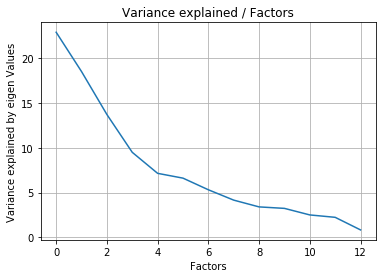

In [83]:
plt.plot(var_exp)
plt.grid()
plt.title('Variance explained / Factors')
plt.ylabel('Variance explained by eigen Values')
plt.xlabel('Factors')

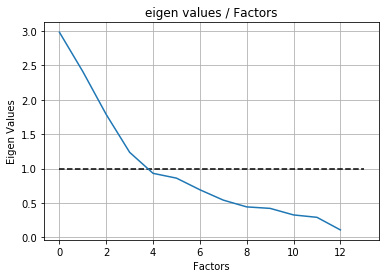

In [84]:
plt.plot(range(0,13),sorted(eig_vals, reverse=True))
plt.grid()
plt.ylabel('Eigen Values')
plt.xlabel('Factors')
plt.title('eigen values / Factors')
plt.hlines(y=1,xmin=0,xmax=13,linestyles='dashed');

In [18]:
print('From the above plot, we can see that the number of components that we can probably take is 6.','\n',
      'We also see that if we take 6 components the total amount of variance explained is',round(cum_var_exp[5],3),'%')

From the above plot, we can see that the number of components that we can probably take is 6. 
 We also see that if we take 6 components the total amount of variance explained is 78.38248924097527 %


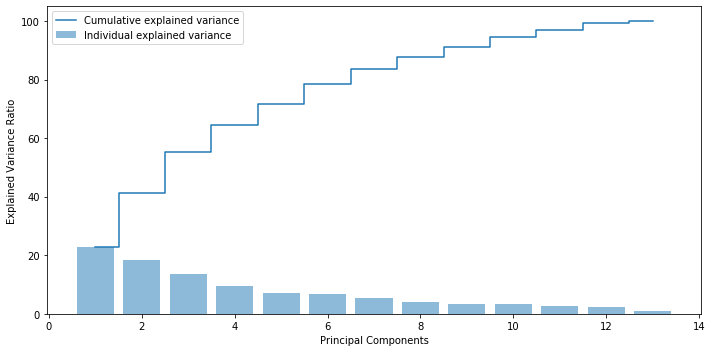

In [51]:
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [88]:
from statsmodels.multivariate.pca import PCA
pc = PCA(X, ncomp=6)
df_comp = pc.loadings.T
df_comp

,WorkingHoursWife,WifeAge,EducationWife,WifeHourEarnings,WifeWage,WorkingHoursHusband,HusbandAge,EducationHusband,HusbandWage,EducationWifeMother,EducationWifeFather,UnemploymentRate,WifeExperience
comp_0,-0.177424,0.268646,-0.443613,-0.276092,-0.278778,-0.033553,0.271126,-0.390302,-0.196630,-0.375744,-0.371109,-0.032692,-0.002222
comp_1,0.428190,0.320737,0.027914,0.383122,0.436976,-0.135936,0.309796,-0.101359,-0.056855,-0.132936,-0.113332,0.014807,0.465379
comp_2,-0.272897,0.469483,0.217753,-0.132601,-0.200938,-0.165626,0.459676,0.252043,0.418032,0.099204,0.199590,0.268341,0.032294
comp_3,0.018008,-0.240811,-0.147597,0.087855,0.096155,-0.650796,-0.240164,-0.079821,0.375879,-0.204903,-0.204439,0.417127,-0.127637
comp_4,-0.102483,-0.006520,0.163898,0.150142,0.041395,0.235340,-0.031756,0.402812,0.378446,-0.491863,-0.431441,-0.376111,-0.083269
comp_5,0.049063,0.016368,-0.106701,-0.058249,-0.052834,-0.499722,0.062166,-0.113026,0.201027,0.205383,0.162543,-0.777235,-0.016888


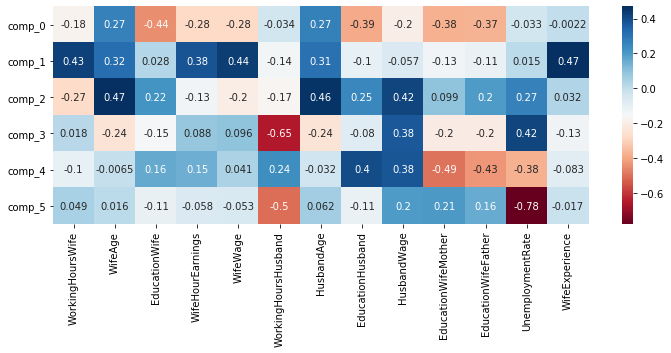

In [86]:
plt.figure(figsize=(12,4))
sns.heatmap(df_comp,cmap='RdBu',annot=True)
plt.show()

In [87]:
pc.factors

,comp_0,comp_1,comp_2,comp_3,comp_4,comp_5
0,-0.019107,-0.001738,-0.067640,-0.020916,0.000299,0.015232
1,-0.005178,-0.015930,-0.058042,0.054033,-0.005109,-0.029012
2,-0.019851,0.019512,-0.065041,-0.041485,0.004189,0.003137
3,0.022086,-0.000003,-0.028621,-0.000746,0.006209,0.036393
4,-0.055158,-0.009212,-0.028315,0.033167,-0.031157,0.012545
...,...,...,...,...,...,...
748,-0.011036,-0.043570,0.018679,-0.023769,0.023900,-0.031417
749,-0.012681,-0.042950,-0.026546,0.000932,-0.041150,0.023424
750,0.030714,-0.028260,-0.021012,-0.017246,0.005202,-0.010527
751,0.025802,0.008736,0.083174,0.017224,-0.075196,0.000157


### 2.5) Perform Multiple Linear Regression with 'FamilyIncome' as the dependent variable and the Principal Components extracted as the independent variables. ###

#### Since the dataset has too may variabes and also, we observed coliinearity between a few independent variables in findings of q 2.2 , hence, we can apply PCA on the data and compare results of regession model again
#### Since we have already seen the PCA model being built before, we are going to use a different submodule to just plot the scree plot. Here, Python takes care of the all the linear algebra processes

**Create Scree Plot to visualise the eigen values and explained variance**

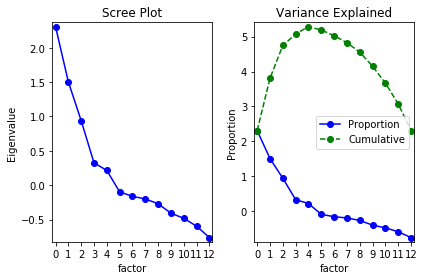

In [91]:
from statsmodels.multivariate.factor import Factor
model=Factor(X).fit()
model.plot_scree()
plt.show()

**Loading the eigen values to the principal component**

In [28]:
from statsmodels.multivariate.pca import PCA
pc = PCA(X, ncomp=6)
df_comp = pc.loadings.T
df_comp

,WorkingHoursWife,WifeAge,EducationWife,WifeHourEarnings,WifeWage,WorkingHoursHusband,HusbandAge,EducationHusband,HusbandWage,EducationWifeMother,EducationWifeFather,UnemploymentRate,WifeExperience
comp_0,-0.177424,0.268646,-0.443613,-0.276092,-0.278778,-0.033553,0.271126,-0.390302,-0.196630,-0.375744,-0.371109,-0.032692,-0.002222
comp_1,0.428190,0.320737,0.027914,0.383122,0.436976,-0.135936,0.309796,-0.101359,-0.056855,-0.132936,-0.113332,0.014807,0.465379
comp_2,-0.272897,0.469483,0.217753,-0.132601,-0.200938,-0.165626,0.459676,0.252043,0.418032,0.099204,0.199590,0.268341,0.032294
comp_3,0.018008,-0.240811,-0.147597,0.087855,0.096155,-0.650796,-0.240164,-0.079821,0.375879,-0.204903,-0.204439,0.417127,-0.127637
comp_4,-0.102483,-0.006520,0.163898,0.150142,0.041395,0.235340,-0.031756,0.402812,0.378446,-0.491863,-0.431441,-0.376111,-0.083269
comp_5,0.049063,0.016368,-0.106701,-0.058249,-0.052834,-0.499722,0.062166,-0.113026,0.201027,0.205383,0.162543,-0.777235,-0.016888


**Extracting the new dataset with reduced six component and check the head of the df**

In [90]:
Y_factors = pc.factors
Y_factors.head()

,comp_0,comp_1,comp_2,comp_3,comp_4,comp_5
0,-0.019107,-0.001738,-0.067640,-0.020916,0.000299,0.015232
1,-0.005178,-0.015930,-0.058042,0.054033,-0.005109,-0.029012
2,-0.019851,0.019512,-0.065041,-0.041485,0.004189,0.003137
3,0.022086,-0.000003,-0.028621,-0.000746,0.006209,0.036393
4,-0.055158,-0.009212,-0.028315,0.033167,-0.031157,0.012545


**check collinearity between the new dimensions of the reduced dataset**

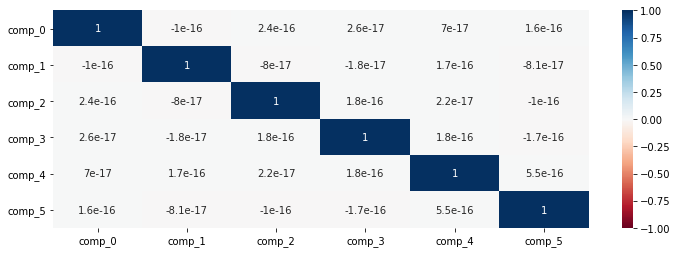

In [89]:
plt.figure(figsize=(12,4))
sns.heatmap(Y_factors.corr(),cmap='RdBu',annot=True,vmin=-1,vmax=1)
plt.show()

**Add constant and split X and y for Regression analysis**

In [92]:
X_pca=sm.add_constant(Y_factors)
X_pca

,const,comp_0,comp_1,comp_2,comp_3,comp_4,comp_5
0,1.0,-0.019107,-0.001738,-0.067640,-0.020916,0.000299,0.015232
1,1.0,-0.005178,-0.015930,-0.058042,0.054033,-0.005109,-0.029012
2,1.0,-0.019851,0.019512,-0.065041,-0.041485,0.004189,0.003137
3,1.0,0.022086,-0.000003,-0.028621,-0.000746,0.006209,0.036393
4,1.0,-0.055158,-0.009212,-0.028315,0.033167,-0.031157,0.012545
...,...,...,...,...,...,...,...
748,1.0,-0.011036,-0.043570,0.018679,-0.023769,0.023900,-0.031417
749,1.0,-0.012681,-0.042950,-0.026546,0.000932,-0.041150,0.023424
750,1.0,0.030714,-0.028260,-0.021012,-0.017246,0.005202,-0.010527
751,1.0,0.025802,0.008736,0.083174,0.017224,-0.075196,0.000157


In [34]:
y.head()

0   -0.555782
1   -0.105121
2   -0.167508
3   -1.295391
4    0.346361
Name: FamilyIncome, dtype: float64

**Perform Multiple Regression on extracted Principal Components**

In [35]:
model = sm.OLS(y,X_pca).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           FamilyIncome   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     96.37
Date:                Sat, 13 Jun 2020   Prob (F-statistic):           1.47e-89
Time:                        17:22:29   Log-Likelihood:                -852.40
No. Observations:                 753   AIC:                             1719.
Df Residuals:                     746   BIC:                             1751.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.031e-17      0.027   1.83e-15      1.000      -0.054       0.054
comp_0       -11.4083      0.754    -15.129      0.000     -12.889      -9.928
comp_1         2.2616      0.754      2.999      0.003       0.781       3.742
comp_2         9.4492      0.754     12.531      0.000       7.969      10.930
comp_3         1.9681      0.754      2.610      0.009       0.488       3.448
comp_4        10.0170      0.754     13.284      0.000       8.537      11.497
comp_5         0.1904      0.754      0.252      0.801      -1.290       1.671
==============================================================================
Omnibus:                      328.028   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2112.158
Skew:                           1.852   Prob(JB):                         0.00
Kurtosis:                      10.322   Cond. No.                         27.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
y_pca_pred = model.predict(X_pca)
print(y_pca_pred)

0     -0.460367
1     -0.475763
2     -0.383075
3     -0.454758
4      0.096434
         ...   
748    0.390511
749   -0.609208
750   -0.596685
751   -0.207976
752   -0.521919
Length: 753, dtype: float64


In [38]:
np.sum(np.square(y - y_pca_pred))

424.1983650466902

**Caculate RMSE value**

In [40]:
mse_pca = (np.sum(np.square(y - y_pca_pred)))/X.shape[0]
Lr_pca = np.sqrt(mse_pca)
print("The MSE value is ", mse_pca, "\nand Root Mean Square Error (RMSE) value is",Lr_pca)

The MSE value is  0.5633444422930812 
and Root Mean Square Error (RMSE) value is 0.7505627504033765


# END